# Predict Diabetes with Machine Learning

Bu proje, diyabet teşhisi için makine öğrenimi tekniklerini kullanarak bir model geliştirmeyi amaçlamaktadır. Proje, bir veri seti üzerinde veri analizi, görselleştirme, ön işleme, model eğitimi ve değerlendirmesi adımlarını kapsamaktadır. Diyabet hastalığını tahmin etmek için çeşitli algoritmalar kullanılacak ve en iyi performansı gösteren model kaydedilecektir.

## Gerekli kütüphaneler

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Veri setini yükleme

In [5]:
diabetes = pd.read_csv('diabetes.csv')

In [6]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [10]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Veri görselleştirme

Sınıf dağılım grafiği

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

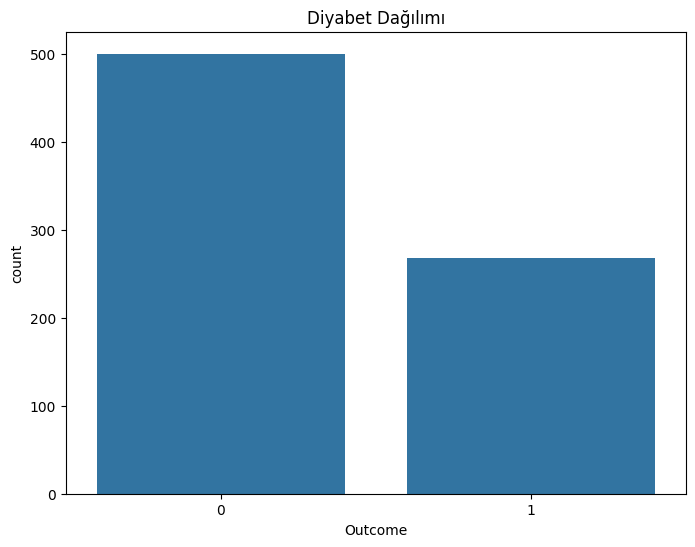

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(x='Outcome', data=diabetes)
plt.title('Diyabet Dağılımı');

Özelliklerin dağılımı

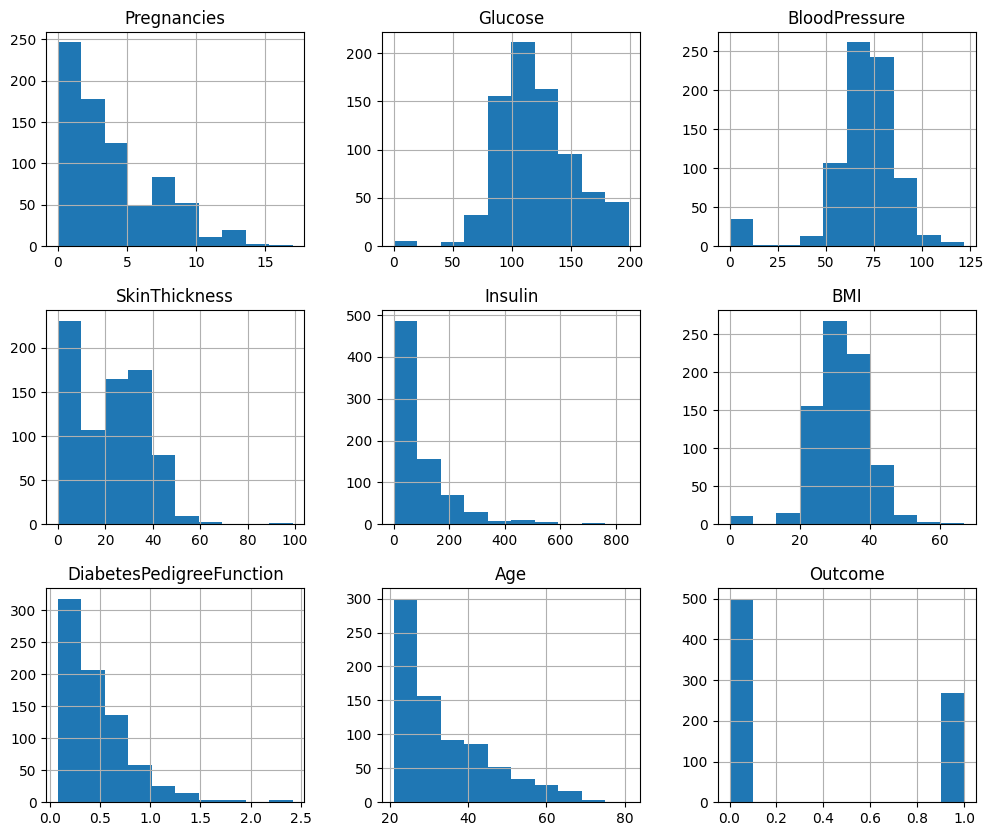

In [16]:
diabetes.hist(figsize=(12,10))
plt.savefig('feature_distributions.png')

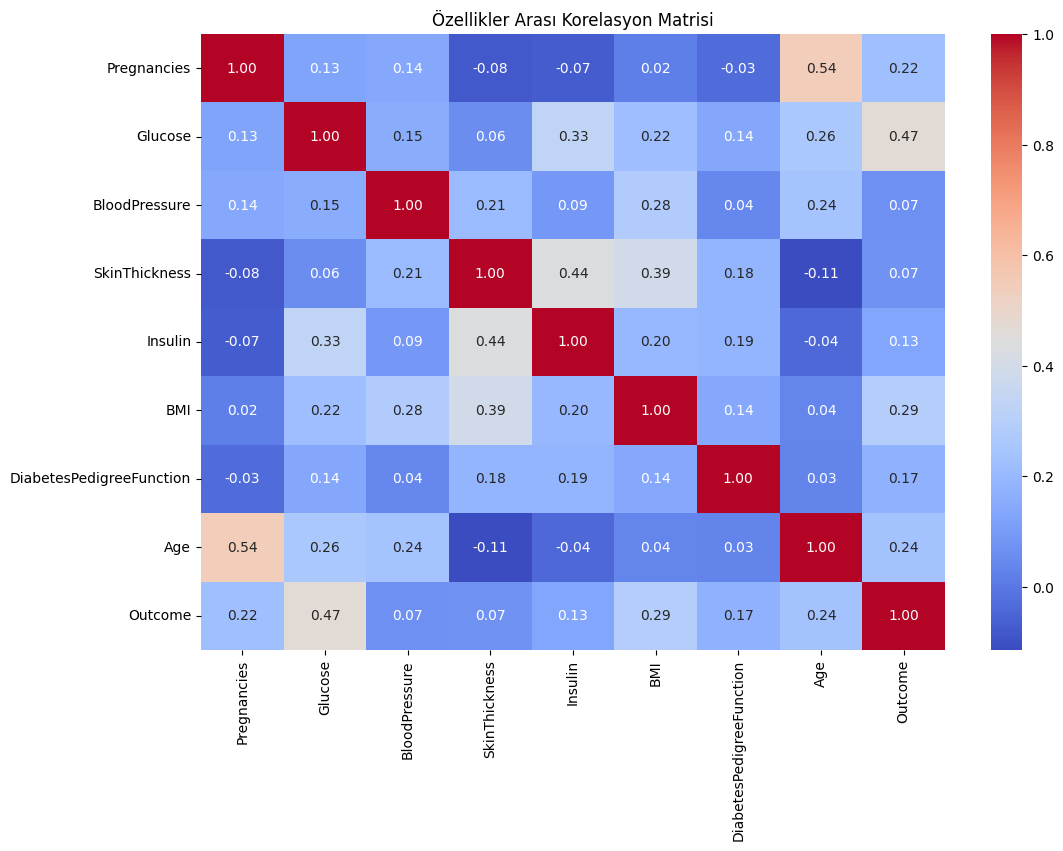

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(diabetes.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Özellikler Arası Korelasyon Matrisi");

## Veri ön işleme

In [19]:
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelleme 

+ K-En Yakın Komşu Modeli

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=9)

+ Karar Ağacı Modeli

In [26]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

+ Yapay Sinir Ağı

In [28]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=42)
mlp.fit(X_train_scaled, y_train)

MLPClassifier(alpha=1, max_iter=1000, random_state=42)

## Model değerlendirem

In [30]:
from sklearn.metrics import accuracy_score, classification_report

In [31]:
# KNN Performansı
knn_pred = knn.predict(X_test_scaled)
print("KNN Doğruluk:", accuracy_score(y_test, knn_pred))

# Karar Ağacı Performansı
tree_pred = tree.predict(X_test)
print("Karar Ağacı Doğruluk:", accuracy_score(y_test, tree_pred))

# MLP Performansı
mlp_pred = mlp.predict(X_test_scaled)
print("YSA Doğruluk:", accuracy_score(y_test, mlp_pred))

KNN Doğruluk: 0.7337662337662337
Karar Ağacı Doğruluk: 0.6948051948051948
YSA Doğruluk: 0.7207792207792207


In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

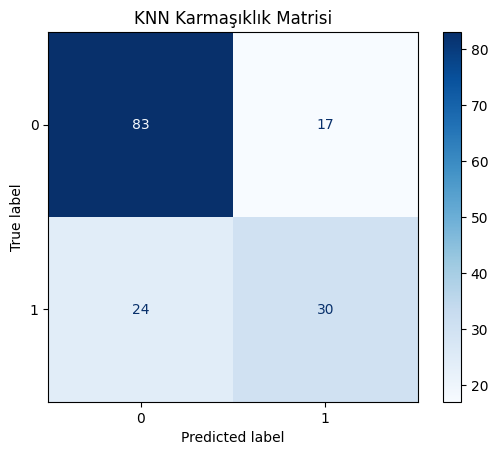

In [64]:
cm = confusion_matrix(y_test, knn_pred)

# Karmaşıklık matrisini görselleştir
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('KNN Karmaşıklık Matrisi')
plt.show()

In [32]:
import joblib
joblib.dump(mlp, 'diabetes_model.pkl')

# Standardizasyon nesnesini kaydet
joblib.dump(scaler, 'scaler.pkl')

print("\nModeller başarıyla kaydedildi!")


Modeller başarıyla kaydedildi!


Yapılan analiz sonucunda, K-En Yakın Komşu, Karar Ağacı ve Yapay Sinir Ağı modelleri eğitilmiştir. En iyi doğruluk oranı YSA ile elde edilmiştir. Tüm modeller başarıyla kaydedilmiş ve bu sayede gelecekteki tahminler için kullanılabilir hale getirilmiştir. Projemiz, makine öğrenimi uygulamalarının sağlık alanındaki potansiyelini göstermektedir.